# Assignment 6.3

Load the ResNet50 model. Perform image classification on five to ten images of your choice. They can be personal images or publically available images. Include the images in `dsc650/assignments/assignment06/images/`. Save the predictions `dsc650/assignments/assignment06/results/predictions/resnet50 directory`. If you are using JupyterHub, you can include those plots in your Jupyter notebook.



In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from pathlib import Path
import os

model = ResNet50(weights='imagenet')

def process_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return(img)

def predict_image(processed_img):
    preds = model.predict(processed_img)
    prediction = decode_predictions(preds, top=1)[0][0]
    _, description, probability = prediction
    return description, probability

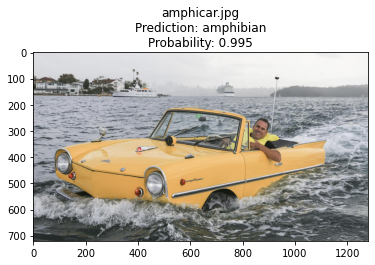

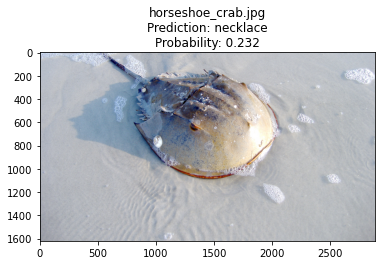

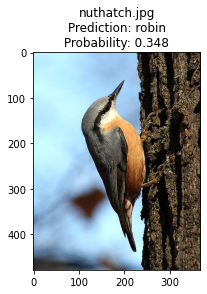

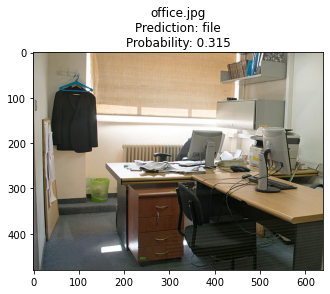

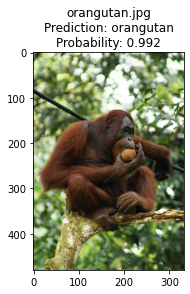

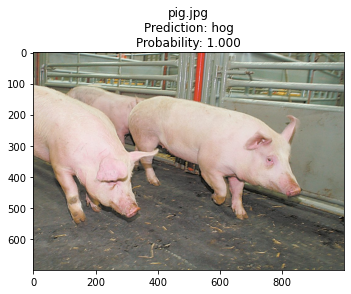

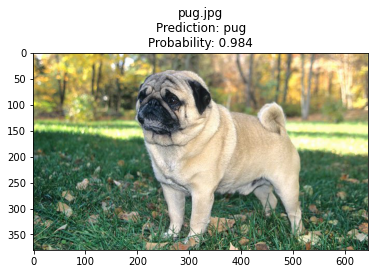

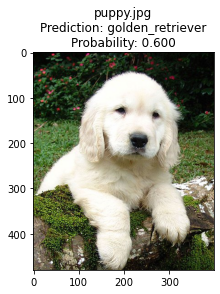

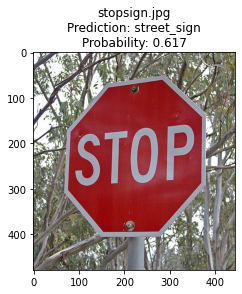

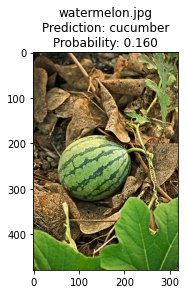

In [2]:
import os
import pandas as pd
from IPython.display import Image

current_dir = Path(os.getcwd()).absolute()
images_dir = current_dir.joinpath('images')

for root, dirs, pictures in os.walk(images_dir):
    for picture in pictures:
        image_path = Path(root).joinpath(picture)
        img = process_image(image_path)
        description, probability = predict_image(img)
        pic = mpimg.imread(image_path)
        plt.imshow(pic)
        plt.title(f'{picture}\nPrediction: {description:^}\nProbability: {probability:.3f}')
        plt.show()